<h1 style="color:rgb(0,120,170)">Assignment 5: Factor Analysis</h1>

<h2 style="color:rgb(0,120,170)">Task 1 (25 Points): Generate toy data for FA</h2>

Generate an $n \times m$ data matrix $\mathbf{X}$, i.e. $n=100$ samples with $m=5$ features, according to the generative factor analysis model with $l=3$ factors. Further, fill $\mathbf{U}$ with random integers from the set $\{-3, \dots, 3\}$ and $\mathbf{\Psi}$ with random integers from the set $\{1, \dots, 3\}$. To save memory, implement $\mathbf{\Psi}$ as a vector. 

In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

########## YOUR SOLUTION HERE ##########
n=100
m=5
l=3

U = np.random.randint(-3,3+1,size=(m,l))
psi_diag_vec = np.random.randint(1,3+1, size=(m))
variance_matrix = U @ U.T
mean = np.zeros((m,))

X = np.random.multivariate_normal(mean=mean, cov=variance_matrix+psi_diag_vec,size=(n)) # + psi forgotten


/home/c/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:15: RuntimeWarning: covariance is not positive-semidefinite.
  from ipykernel import kernelapp as app


<h2 style="color:rgb(0,120,170)">Task 2 (25 Points): Derive GD for FA</h2>

Construct the negative log-likelihood $\ell(\mathbf{U}, \mathbf{\Psi}) = -\log\mathcal{L}(\mathbf{X}; \mathbf{U}, \mathbf{\Psi})$, according to the FA model assumptions and calculate its gradients with respect to the model parameters, i.e. $\nabla_{\mathbf{U}} \ell(\mathbf{U}, \mathbf{\Psi})$ and $\nabla_{\mathbf{\Psi}} \ell(\mathbf{U}, \mathbf{\Psi})$. 

########## YOUR SOLUTION HERE ##########

Getting started with the loglikelihood:
\begin{align*}
\sum_{n=1}^N E_q (log(p(x_n|y))\\
= \sum_{n=1}^N \left(    - \frac{m log(2 \pi)}{2}  - \frac{1}{2} log(det(\psi)) - \frac{1}{2} E_q \left[ (x_n-Uy)^T \psi^{-1} (x_n- Uy)  \right]            \right)\\
= \sum_{n=1}^N \left(    - \frac{m log(2 \pi)}{2} \right) - \sum_{n=1}^N \left(\frac{1}{2} log(det(\psi))\right) - \sum_{n=1}^N \left(\frac{1}{2} E_q \left[ (x_n-Uy)^T \psi^{-1} (x_n- Uy)  \right]            \right)
\\
=   - \frac{m N log(2 \pi)}{2} - \frac{N}{2} log(det(\psi)) -\frac{1}{2}  \sum_{n=1}^N \left(E_q \left[ (x_n-Uy)^T \psi^{-1} (x_n- Uy)  \right]            \right)
\\
=   - \frac{m N log(2 \pi)}{2} - \frac{N}{2} log(det(\psi)) -\frac{1}{2}  \sum_{n=1}^N \left(E_q \left[ x_n^T \psi^{-1}x_n - 2 x_n^T \psi^{-1} U y + y^T U^T \psi^{-1} U y \right]            \right)
\\
=   - \frac{m N log(2 \pi)}{2} - \frac{N}{2} log(det(\psi)) -\frac{1}{2}  \left(E_q \left[ \sum_{n=1}^N x_n^T \psi^{-1}x_n - \sum_{n=1}^N 2 x_n^T \psi^{-1} U y +\sum_{n=1}^N  y^T U^T \psi^{-1} U y \right]            \right)
\\
=   - \frac{m N log(2 \pi)}{2} - \frac{N}{2} log(det(\psi)) -\frac{1}{2}
\left(E_q \left[ \sum_{n=1}^N x_n^T \psi^{-1}x_n\right] -2
E_q \left[\sum_{n=1}^N x_n^T \psi^{-1} U y \right] +
E_q \left[\sum_{n=1}^N  y^T U^T \psi^{-1} U y \right]            \right)
\\
\end{align*}
In Task 3 the modification of the formula is continued such that it is of usage for a coding implementation.

We need the negative log likelihood:
\begin{align*}
-\sum_{n=1}^N E_q (log(p(x_n|y))
=   \frac{m N log(2 \pi)}{2} + \frac{N}{2} log(det(\psi))+ \frac{1}{2}
\left(E_q \left[ \sum_{n=1}^N x_n^T \psi^{-1}x_n\right] -2
E_q \left[\sum_{n=1}^N x_n^T \psi^{-1} U y \right] +
E_q \left[\sum_{n=1}^N  y^T U^T \psi^{-1} U y \right]            \right)
\\\\\\\\
\end{align*}


Getting the derivatives after U:
\begin{align*}
\frac{\partial \frac{Nm \log(2 \pi)}{2}}{\partial U} = 0
\end{align*}

\begin{align*}
\frac{\partial \frac{N \log(\prod_i^m \psi_{ii})}{2}}{\partial U} = 0
\end{align*}


\begin{align*}
\nabla_{\mathbf{U}} \ell(\mathbf{U}, \mathbf{\Psi})
= \frac{\partial 0.5 \cdot\sum_{n=1}^N E_q\left[  x_n^T \psi^{-1}x_n - 2 x_n^T \psi^{-1} U y + y^T U^T \psi^{-1} U y  \right]}{\partial U}
\\
= 0.5 \cdot \sum_{n=1}^N E_q\left[ \frac{\partial x_n^T \psi^{-1}x_n - 2x_n^T \psi^{-1} U y + y^T U^T \psi^{-1} U y}{\partial U } \right]
\\
=0.5 \cdot  \sum_{n=1}^N E_q\left[ 0 - 2\psi^{-1} x_n y^T + 2 \psi^{-1} U y y^T\right]
\\
= 0.5 \cdot \sum_{n=1}^N \left[ E_q\left[-2\psi^{-1} x_n y^T\right] + E_q \left[2 \psi^{-1} U y y^T\right] \right]
\\
= 0.5 \cdot \sum_{n=1}^N \left[-2\psi^{-1} E_q\left[x_n y^T\right] + 2 \psi^{-1} U E_q \left[ y y^T\right] \right]\\
= 0.5 \cdot 2\psi^{-1} \sum_{n=1}^N \left[-x_n E_q\left[ y^T\right] +  U E_q \left[ y y^T\right] \right]
\\
= \psi^{-1} \sum_{n=1}^N -x_n E_q\left[ y^T\right] + \psi^{-1} \sum_{n=1}^N U E_q \left[ y y^T\right] 
\\
\end{align*}

Getting the derivatives after $\psi$:
\begin{align*}
\frac{\partial \frac{Nm \log(2 \pi)}{2}}{\partial \psi} = 0
\end{align*}

\begin{align*}
\frac{\partial \frac{N \log(\prod_i^m \psi_{ii})}{2}}{\partial \psi} \\
= \frac{N}{2} \frac{\partial \log(\prod_i^m \psi_{ii})}{\partial \psi} \\
= \frac{N}{2} \frac{\partial \sum_i^m \log(\psi_{ii})}{\partial \psi} \\
= \frac{N}{2} \frac{1}{\psi^T}\\
= \frac{N}{2} (\psi^T)^{-1}\\
= \frac{N}{2} (\psi)^{-1}\\
\end{align*}
because we have a diagonal matrix.


\begin{align*}
\frac{\partial \sum_{n=1}^N E_q\left[  x_n^T \psi^{-1}x_n - 2 x_n^T \psi^{-1} U y + y^T U^T \psi^{-1} U y  \right]}{\partial \psi}
\\
=\sum_{n=1}^N E_q\left[  \frac{\partial x_n^T \psi^{-1}x_n - 2 x_n^T \psi^{-1} U y + y^T U^T \psi^{-1} U y }{\partial \psi} \right]
\\
=\sum_{n=1}^N E_q\left[  \frac{\partial x_n^T \psi^{-1}x_n}{\partial \psi} - \frac{2 x_n^T \psi^{-1} U y}{\partial \psi} +\frac{ y^T U^T \psi^{-1} U y }{\partial \psi} \right]
\\
=\sum_{n=1}^N E_q\left[  -\psi^{-T}x_n x_n^T \psi^{-T}  -2 (-\psi^{-T}x_n (Uy)^T \psi^{-T} )+( -\psi^{-T} (y^T U^T)^T (Uy)^T \psi^{-T} )\right]
\\
=\sum_{n=1}^N E_q\left[  -\psi^{-T}x_n x_n^T \psi^{-T}  +2 \psi^{-T}x_n y^TU^T \psi^{-T}  -\psi^{-T} Uy y^T U^T \psi^{-T} \right]
\\
=\sum_{n=1}^N \left( E_q\left[  -\psi^{-T}x_n x_n^T \psi^{-T}\right] + E_q\left[  2 \psi^{-T}x_n y^TU^T \psi^{-T}\right]  - E_q\left[\psi^{-T} Uy y^T U^T \psi^{-T} \right]\right)
\\
\end{align*}
Because $\psi$ is diagnoal matrix we can ignore transpose:
\begin{align*}
=\sum_{n=1}^N \left( -\psi^{-1}x_n x_n^T \psi^{-1}E_q\left[ 1 \right] +2  E_q\left[  \psi^{-1}x_n y^TU^T \psi^{-1}\right]  - E_q\left[\psi^{-1} Uy y^T U^T \psi^{-1} \right]\right)
\\
=\sum_{n=1}^N \left( -\psi^{-1}x_n x_n^T \psi^{-1} +2  E_q\left[  \psi^{-1}x_n y^TU^T \psi^{-1}\right]  - E_q\left[\psi^{-1} Uy y^T U^T \psi^{-1} \right]\right)
\\
\end{align*}

\begin{align*}
\nabla_{\mathbf{\Psi}} \ell(\mathbf{U}, \mathbf{\Psi}) 
= \frac{N}{2} (\psi)^{-1} + \frac{1}{2} \sum_{n=1}^N \left( -\psi^{-1}x_n x_n^T \psi^{-1} +2  E_q\left[  \psi^{-1}x_n y^TU^T \psi^{-1}\right]  - E_q\left[\psi^{-1} Uy y^T U^T \psi^{-1} \right]\right)
\\
= \frac{N}{2} (\psi)^{-1} + \frac{1}{2} \sum_{n=1}^N -\psi^{-1}x_n x_n^T \psi^{-1} +2 \sum_{n=1}^N  E_q\left[  \psi^{-1}x_n y^TU^T \psi^{-1}\right]  - \sum_{n=1}^N  E_q\left[\psi^{-1} Uy y^T U^T \psi^{-1} \right]
\\
 = \frac{N}{2} (\psi)^{-1} -\frac{1}{2} \sum_{n=1}^N \psi^{-1}x_n x_n^T \psi^{-1} +2 \sum_{n=1}^N \psi^{-1}x_n E_q\left[   y^T\right] U^T \psi^{-1} - \sum_{n=1}^N \psi^{-1} U E_q\left[y y^T  \right]U^T \psi^{-1}
\end{align*}

<h2 style="color:rgb(0,120,170)">Task 3 (25 Points): Implement GD for FA</h2>

Use your results from the previous task to implement gradient descent on the negative log-likelihood for factor analysis. Initialize $\mathbf{U}$ and $\mathbf{\Psi}$ randomly uniform in $[-0.1, 0.1]$. To speed up computations, use the matrix inversion lemma $(\mathbf{UU}^\top + \mathbf{\Psi})^{-1} = \mathbf{\Psi}^{-1} - \mathbf{\Psi}^{-1}\mathbf{U}(\mathbf{I} + \mathbf{U^\top \mathbf{\Psi}^{-1} \mathbf{U}})^{-1}\mathbf{U}^\top \mathbf{\Psi}^{-1}$ wherever possible and adjust the learning rate properly. Since we know the true parameters $\bar{\mathbf{U}}$ and $\bar{\mathbf{\Psi}}$ for our toy data set, we can measure the loss by $\lVert \bar{\mathbf{U}}\bar{\mathbf{U}}^\top + \bar{\mathbf{\Psi}} - \mathbf{U}\mathbf{U}^\top - \mathbf{\Psi} \rVert$. Visualize the learning progress over 1000 update steps of 10 runs which differ only by initializiation in terms of this matrix (i.e. Frobenius) norm expression.

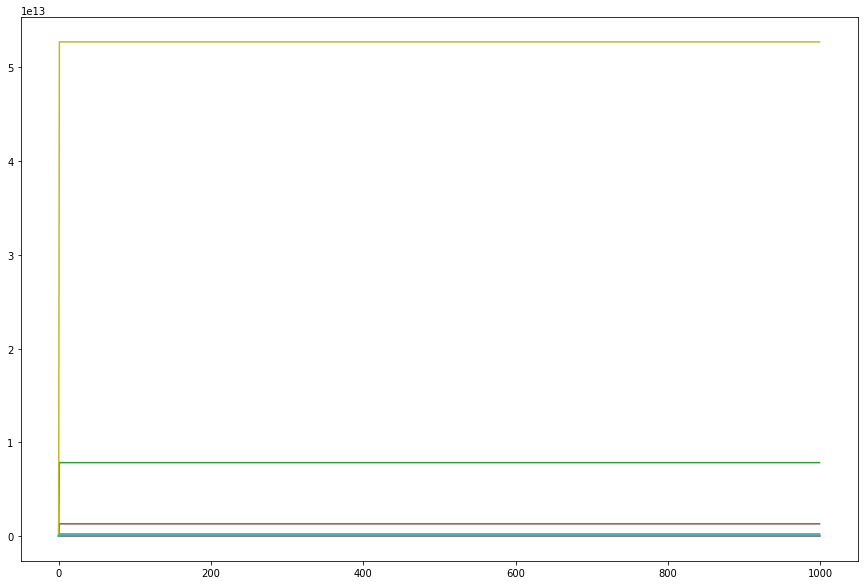

In [2]:
########## YOUR SOLUTION HERE ##########
import random

random.seed(0)
learningrate = 0.01
final_list0 = []
for run in range(10):
    
    U2 = np.random.uniform(-0.1,0.1,size=(m,l))
    psi2_diag = np.random.uniform(-0.1,0.1,size=(m,))
    psi2_inv = np.linalg.inv(np.diag(psi2_diag))
    
    
    loss_list = []
    for update in range(1000):
        psi2_sum = np.sum(psi2_diag)

        # (UU^T+ psi)^(-1)=
        given_replacer = psi2_inv - psi2_inv @ U2 @ np.linalg.inv(np.identity(l) + U2.T @ psi2_inv @ U2) @ U2.T @ psi2_inv


        gradientU1= 0
        gradientl2, gradientl3, gradientl4 = 0,0,0
        
        for x in X: # x is already x.T!
            x = x.reshape((1,5))
       
        
            Ey = U2.T@ given_replacer@ x.T
            EyyT = Ey @ Ey.T + (np.identity(l) - U2.T @ given_replacer @ U2)
            
            gradientU1 += (U @ EyyT)-( x.T @ Ey.T) 

            gradientl2 += psi2_inv @ x.T @ x @ psi2_inv
            gradientl3 += psi2_inv @ x.T @ Ey.T @ U2.T @ psi2_inv
            gradientl4 += psi2_inv @ U2 @ EyyT @ U2.T @ psi2_inv



        # derivative by U:
        gradientU =  psi2_inv @ gradientU1
        
        # derivative by psi:
        gradientl1 = n * psi2_inv/2
        gradientl = gradientl1 - 0.5 * gradientl2 + 2* gradientl3 - gradientl4

       
        # calculate the loss:
        loss_matrix = U @ U.T + np.diag(psi_diag_vec) - U2 @ U2.T - np.diag(psi2_diag)
        loss_value = np.linalg.norm(x=loss_matrix, ord=2)
        
        # append the loss list for later visualization:
        loss_list.append(loss_value)
        
        # Update values:
        U2 = U2 - learningrate * gradientU
        psi2_diag = np.diag(np.diag(psi2_diag - learningrate * gradientl))
        psi2_inv = np.linalg.inv(psi2_diag)
        
        
        
    final_list0.append(loss_list) 
    
plt.figure(figsize=(15,10))
for i in final_list0: # final list is a nested list of the 10 runs. plot loss results for the 10 runs.
    plt.plot(i)
plt.show()  


<h2 style="color:rgb(0,120,170)">Task 4 (25 Points): Implement EM for FA</h2>

Implement expectation maximization for factor analysis. Use the same data and initialization scheme as in the previous task. Visualize the learning progress over 100 update steps in terms of the loss function $\lVert \bar{\mathbf{U}}\bar{\mathbf{U}}^\top + \bar{\mathbf{\Psi}} - \mathbf{U}\mathbf{U}^\top - \mathbf{\Psi} \rVert$ for 10 runs which differ only by initialization. Compare your results to those in the previous exercise and interpret the ovserved differences. 

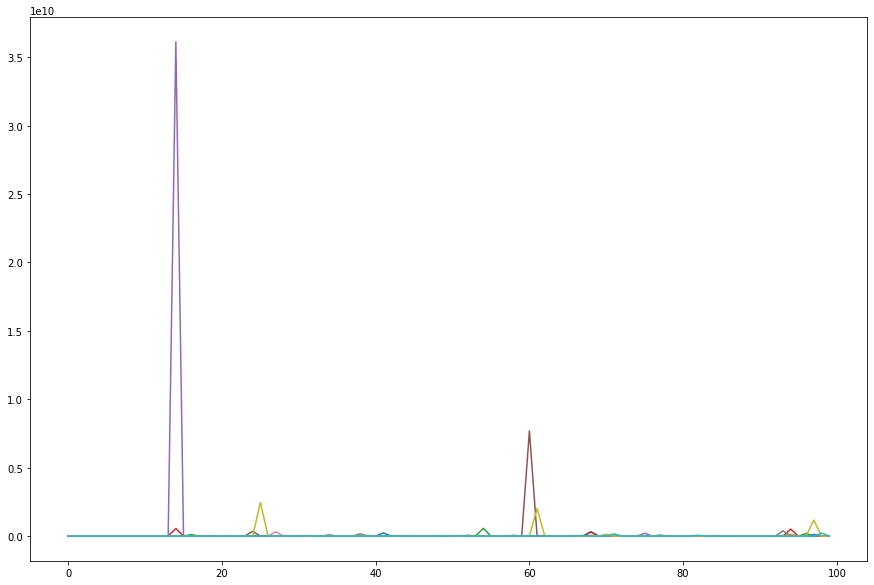

In [4]:
########## YOUR SOLUTION HERE ##########
random.seed(0)
final_list = []
for run in range(10):
    
    U2 = np.random.uniform(-0.1,0.1,size=(m,l))
    psi2_diag = np.random.uniform(-0.1,0.1,size=(m,))
    psi2_inv = np.linalg.inv(np.diag(psi2_diag))
    
    loss_list = []
    for i in range(100): # 100 updates per run
        psi2_sum = np.sum(psi2_diag)

        # (UU^T+ psi)^(-1)=
        given_replacer = psi2_inv -psi2_inv @ U2 @ np.linalg.inv(np.identity(l) + U2.T @ psi2_inv @ U2) @ U2.T @ psi2_inv


        # U optimization task 4:
        U21 = 0
        U22 = 0
        # psi optimization task 4:
        psi21 = 0
        psi22 = 0
              
        for x in X: # x is already x.T!
            x = x.reshape((1,5))


            Ey = U2.T @ given_replacer @ x.T

            EyyT = ((U2.T @ given_replacer @ x.T)@(U2.T@given_replacer@x.T).T+(np.identity(l)-U2.T@given_replacer@U2)) 
           
            # U optimization task 4:
            U21 += x.T @ Ey.T
            U22 += np.linalg.inv(EyyT)
            
            # psi optimization task 4:
            psi21 += x.T @ x
            psi22 += x.T @ Ey.T @ U.T
            

        # U optimization task 4:
        U2 = (U21/n) @ (U22/n)

        # psi optimization task 4:
        psi2 = np.diag(np.diag(psi21 - psi22))/n
        psi2_inv = np.linalg.inv(psi2)

        # calculate the loss:
        loss_matrix = U@U.T + np.diag(psi_diag_vec) - U2 @ U2.T - np.diag(psi2_diag)
        loss_value = np.linalg.norm(x=loss_matrix, ord=2)
    
        # append the loss list for later visualization:
        loss_list.append(loss_value)
        

     #   print('done')
    final_list.append(loss_list)  
    
plt.figure(figsize=(15,10))
for i in final_list: # final list is a nested list of the 10 runs. plot loss results for the 10 runs.
    plt.plot(i)

plt.show() 


For the EM for FA we can find high peaks of losses. We can also find comparatively small loss peaks. However the peaks are steep such that less iterations before/after it we have the low loss values. Furthermore, we can find with very few iterations good estimations. <br>
Gradient Descent doesn't seem to work for Factor Analysis because the loss values doesn't change over the iterations. 1000 iterations don't seem to be enough here. 